# Monomer gating

\begin{align}
E &= E_f + E_c \\
\frac{d[E_f]}{dt} &= k_N [WA] [E] - k_C [E_f] \\
\frac{d[WA]}{dt} &= k_A ([WA]_{max} - [WA]) - k_N [WA][E] - k_P [WA][E_f]
\end{align}

At steady state:

\begin{align}
0 &= k_N [WA]_{eq} [E]_{eq} - k_C [E_f]_{eq} \\
0 &= k_A ([WA]_{max} - [WA]_{eq}) - k_N [WA]_{eq} [E]_{eq} - k_P [WA]_{eq} [E_f]_{eq}
\end{align}

Combining:

\begin{align}
0 &= k_A ([WA]_{max} - [WA]_{eq}) - k_C [E_f]_{eq} - k_P [WA]_{eq} [E_f]_{eq} \\
[E_f]_{eq} &= \frac{k_A ([WA]_{max} - [WA]_{eq})}{k_C + k_P [WA]_{eq}}
\end{align}

Knowing that at steady state $\frac{d[E_f]_{eq}}{dt} = 0$ and $\frac{d[E_c]_{eq}}{dt} = k_C [E_f]_{eq}$:

\begin{align}
\frac{d[E]_{eq}}{dt} &= \frac{d[E_f]_{eq}}{dt} + \frac{d[E_c]_{eq}}{dt} \\
\frac{d[E]_{eq}}{dt} &= k_C [E_f]_{eq}
\end{align}

We obtain an expression for the nucleation rate:

\begin{align}
\frac{d[E]_{eq}}{dt} &= \frac{k_A ([WA]_{max} - [WA]_{eq})}{1 + \frac{k_P}{k_C} [WA]_{eq}}
\end{align}

In [1]:
def nucleationrate(kNuc = 10.0, kCap = 0.1, kAct = 0.1, kPol = 100.0, wMax = 1.0):

    from numpy import array, arange, zeros, gradient

    # Set up simulation parameters and variables.
    dt = 1e-4
    tFinal = 500.0
    timeArr = arange(0.0, tFinal, dt)
    noIterations = len(timeArr)
    barbFreeArr = zeros(noIterations)
    barbFreeArr[0] = 1e-2
    barbCapArr = zeros(noIterations)
    barbTotArr = barbFreeArr + barbCapArr
    waArr = zeros(noIterations)

    for i in range(noIterations - 1):
        # Calculate differences.
        dBarbCap = kCap * barbFreeArr[i] * dt
        dBarbFree = (kNuc * waArr[i] * barbTotArr[i]) * dt - dBarbCap
        dWa = (kAct * (wMax - waArr[i]) - kNuc * waArr[i] * barbTotArr[i] - kPol * waArr[i] * barbFreeArr[i]) * dt
        # Update.
        barbCapArr[i + 1] = barbCapArr[i] + dBarbCap
        barbFreeArr[i + 1] = barbFreeArr[i] + dBarbFree
        barbTotArr[i + 1] = barbFreeArr[i + 1] + barbCapArr[i + 1]
        waArr[i + 1] = waArr[i] + dWa
    
    gTimeArr = gradient(timeArr)
    gBarbTotArr = gradient(barbTotArr)
    nucRate = gBarbTotArr[-1] / gTimeArr[-1]
    barbFreeEq = barbFreeArr[-1]
    waEq = waArr[-1]
    branchedNetwork = {'nucleation-rate': nucRate, 'free-eq': barbFreeEq, 'wh2-eq': waEq, 'total-end-eq': barbTotArr[-1]}
    return branchedNetwork

In [2]:
from numpy import linspace, zeros
from matplotlib.pyplot import plot, xlabel, ylabel
%matplotlib inline

capRateArr = linspace(0.0, 1.0, 50)
nucRateArr = zeros(50)
barbFreeEqArr = zeros(50)
waEqArr = zeros(50)
barbTotEqArr = zeros(50)

for i in range(50):
    branchedNetwork = nucleationrate(0.5, capRateArr[i], 100.0, 100.0, 1.0)
    nucRateArr[i] = branchedNetwork['nucleation-rate']
    barbFreeEqArr[i] = branchedNetwork['free-eq']
    waEqArr[i] = branchedNetwork['wh2-eq']
    barbTotEqArr[i] = branchedNetwork['total-end-eq']

Text(0,0.5,'Nucleation rate')

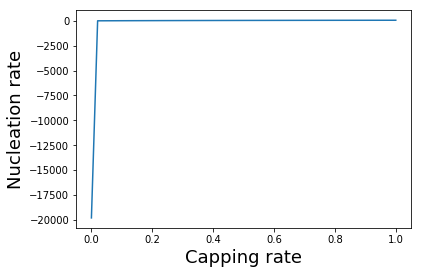

In [3]:
plot(capRateArr, nucRateArr)
xlabel(r"Capping rate", fontsize = 18)
ylabel(r"Nucleation rate", fontsize = 18)

Text(0,0.5,'Free barbed end concentration')

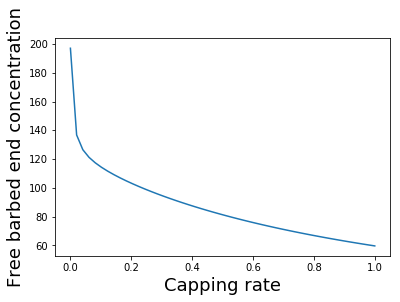

In [4]:
plot(capRateArr, barbFreeEqArr)
xlabel(r"Capping rate", fontsize = 18)
ylabel(r"Free barbed end concentration", fontsize = 18)

Text(0,0.5,'WH2 occupancy')

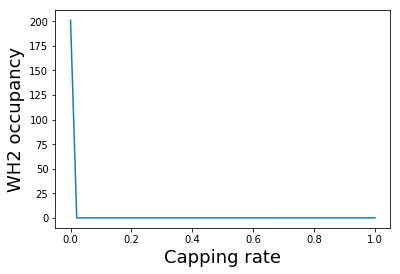

In [5]:
plot(capRateArr, waEqArr)
xlabel(r"Capping rate", fontsize = 18)
ylabel(r"WH2 occupancy", fontsize = 18)

Text(0,0.5,'Nucleation rate')

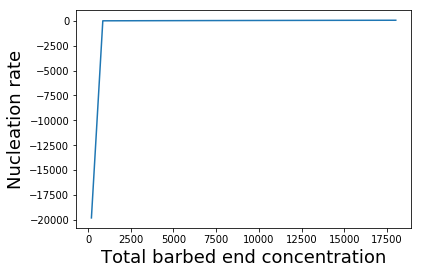

In [6]:
plot(barbTotEqArr, nucRateArr)
xlabel(r"Total barbed end concentration", fontsize = 18)
ylabel(r"Nucleation rate", fontsize = 18)